## import

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic') 
mpl.rc('axes', unicode_minus=False)
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000
%matplotlib inline
%config InlineBackend.figure_format='retina'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/final_data (1).csv')
df = data.copy()
df = df.drop(columns=['Unnamed: 0','거래일'])
num_feature = ['세대','인구','자동차등록','인구이동(전입지별)',
               '출생아수(명)', '사망자수(명)' ,'혼인건수(건)','이혼건수(건)']
for col in num_feature:
  df[col] = df[col].str.replace(",","").astype(int)
df['평당가'] = df['거래금액'] / df['전용면적']
df['거래횟수'] = [1]*len(df.index)

In [ ]:
from sklearn.cluster import KMeans
구별랭킹 = pd.concat([df.groupby('지역코드').mean()[['평당가','거래금액']].sort_values('평당가',ascending=False),                 
                      df.groupby('지역코드').sum()[['거래횟수']]],
                      axis = 1)
kmeans = KMeans(n_clusters=5)
kmeans.fit(구별랭킹)
구별랭킹['구별K'] = kmeans.labels_
구별랭킹

,평당가,거래금액,거래횟수,구별K
강남구,1965.900547,172790.735915,12265,1
서초구,1726.341862,163525.710964,9850,1
송파구,1423.073380,117229.070079,15240,2
용산구,1417.798535,145481.003948,4812,1
성동구,1266.980612,98494.772688,9344,2
마포구,1191.961147,90848.400701,8842,2
광진구,1114.909593,93132.966703,4535,2
동작구,1071.001067,85849.420518,8461,4
영등포구,1029.975473,78392.765241,10121,4
강동구,1027.079886,75117.814662,12399,4


In [ ]:
gu_mapper = {gu:k for gu,k in zip(구별랭킹.index,구별랭킹.구별K)}
df['구별K'] = df['지역코드'].copy()
df['구별K'] = df['구별K'].replace(gu_mapper)

In [ ]:
dataset = df.drop(columns=['거래횟수','평당가','지번','-\xa0집세'])
dataset.columns = ['지역코드', '법정동', '아파트', '전용면적', '층', '건축년도', '거래금액', '거래년도', '거래월일', '세대',
       '인구', '세대당인구', '자동차등록', '인구이동(전입지별)', '외국인증권투자', '국고채 3년(평균)',
       '국고채 5년(평균)', '국고채 10년(평균)', '회사채 3년(평균)', 'CD 91물(평균)', '콜금리(1일물,평균)',
       '소비자물가', '- 농축수산물', '- 공업제품', '- 공공서비스', '- 개인서비스', '근원물가', '출생아수(명)',
       '사망자수(명)', '혼인건수(건)', '이혼건수(건)', 'KS11', 'KQ11', 'DJI', 'IXIC', 'VIX',
       'CSI300', 'SSEC', 'DE30', 'FCHI', 'NG', 'GC', 'HG', 'CL', '구별K']

dataset = dataset.drop(columns=['세대당인구','국고채 3년(평균)','국고채 5년(평균)','- 개인서비스','콜금리(1일물,평균)','CSI300','HG'])

In [ ]:
def engine(xxx):
  xxx['KRX'] = xxx.KS11 + xxx.KQ11
  xxx = xxx.drop(columns=['KS11','KQ11'])
  return xxx

In [ ]:
df.shape

(244456, 49)

In [ ]:
DF_1 = engine(dataset.copy())
DF_1.shape

(244456, 37)

In [ ]:
dataset = DF_1

In [ ]:
target='거래금액'
train = dataset[(dataset.거래월일 != '2021-01') | (dataset.거래월일 != '2021-02')].copy()
test = dataset[(dataset.거래월일 == '2021-01') | (dataset.거래월일 == '2021-02')].copy()
print(train.shape,test.shape)
print(test.거래월일.value_counts())

(244456, 37) (5248, 37)
2021-01    4826
2021-02     422
Name: 거래월일, dtype: int64


In [ ]:
X = train.drop(columns=target)
y = train[target]
X_test = test.drop(columns=target)
y_test = test[target]
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
! pip install category_encoders

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder

# Train Model with the bestparams

## Train

In [ ]:
from lightgbm import LGBMRegressor
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

In [ ]:
lightGB = LGBMRegressor(learning_rate=0.01, max_depth=15, n_estimators=300000, num_leaves=250,
                      random_state=1, reg_alpha=1, reg_lambda=1, subsample=0.7)

eval_set = [(X_train_encoded, y_train),
            (X_val_encoded,y_val), 
            (X_test_encoded, y_test)]

lightGB.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=1000,
          eval_metric='mae',
          verbose=100
         )

Training until validation scores don't improve for 1000 rounds.
[100]	training's l2: 6.90015e+08	training's l1: 18469.4	valid_1's l2: 7.14172e+08	valid_1's l1: 18659.5	valid_2's l2: 1.31764e+09	valid_2's l1: 24412.7
[200]	training's l2: 2.87203e+08	training's l1: 12010.8	valid_1's l2: 3.13785e+08	valid_1's l1: 12318.7	valid_2's l2: 5.97823e+08	valid_2's l1: 17092.1
[300]	training's l2: 1.83409e+08	training's l1: 9469.54	valid_1's l2: 2.12929e+08	valid_1's l1: 9860.77	valid_2's l2: 3.73259e+08	valid_2's l1: 13603.4
[400]	training's l2: 1.38316e+08	training's l1: 8064.56	valid_1's l2: 1.69659e+08	valid_1's l1: 8498.8	valid_2's l2: 2.78117e+08	valid_2's l1: 11695.6
[500]	training's l2: 1.15726e+08	training's l1: 7294.36	valid_1's l2: 1.48272e+08	valid_1's l1: 7758.52	valid_2's l2: 2.2907e+08	valid_2's l1: 10514.4
[600]	training's l2: 1.00786e+08	training's l1: 6739.85	valid_1's l2: 1.3439e+08	valid_1's l1: 7236.05	valid_2's l2: 2.04589e+08	valid_2's l1: 9869.29
[700]	training's l2: 9.0509

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=15,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=300000, n_jobs=-1, num_leaves=250, objective=None,
              random_state=1, reg_alpha=1, reg_lambda=1, silent=True,
              subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

## Predict

In [ ]:
y_train_pred = lightGB.predict(X_train_encoded)
y_val_pred = lightGB.predict(X_val_encoded)
y_test_pred = lightGB.predict(X_test_encoded)

# Explore my prediction

## Evaluation

In [ ]:
len(y_test_pred),len(y_test)

(5248, 5248)

In [ ]:
from sklearn.metrics import r2_score
print('훈련 R2 : ',r2_score(y_train,y_train_pred))
print('검증 R2 : ',r2_score(y_val,y_val_pred))
print('TEST R2 : ',r2_score(y_test,y_test_pred))

훈련 R2 :  0.9974828137234438
검증 R2 :  0.9770277604797325
TEST R2 :  0.9917287336103573


In [ ]:
print('훈련 MAE : ',mean_absolute_error(y_train,y_train_pred))
print('검증 MAE : ',mean_absolute_error(y_val,y_val_pred))
print('TEST MAE : ',mean_absolute_error(y_test,y_test_pred))

훈련 MAE :  1652.3193584226121
검증 MAE :  3967.391472684558
TEST MAE :  2805.2859773498003


## See How this model predict

In [ ]:
X_test.columns

Index(['지역코드', '법정동', '아파트', '전용면적', '층', '건축년도', '거래년도', '거래월일', '세대', '인구',
       '자동차등록', '인구이동(전입지별)', '외국인증권투자', '국고채 10년(평균)', '회사채 3년(평균)',
       'CD 91물(평균)', '소비자물가', '- 농축수산물', '- 공업제품', '- 공공서비스', '근원물가',
       '출생아수(명)', '사망자수(명)', '혼인건수(건)', '이혼건수(건)', 'DJI', 'IXIC', 'VIX',
       'SSEC', 'DE30', 'FCHI', 'NG', 'GC', 'CL', '구별K', 'KRX'],
      dtype='object')

In [ ]:
df_pred = pd.DataFrame(y_test)
df_pred = df_pred.reset_index(drop=True)
df_pred['예측금액'] = y_test_pred
df_pred['차이'] = df_pred['거래금액'] - df_pred['예측금액']
df_pred['차이(%)'] = df_pred['차이']/df_pred['거래금액']*100
df_pred[['지역코드', '법정동', '아파트', '전용면적', '층', '건축년도', '거래월일']] = X_test.reset_index()[['지역코드', '법정동', '아파트', '전용면적', '층', '건축년도', '거래월일']]
df_pred['count'] = [1]*len(y_test_pred)
df_pred

,거래금액,예측금액,차이,차이(%),지역코드,법정동,아파트,전용면적,층,건축년도,거래월일,count
0,127000,127036.614265,-36.614265,-0.028830,종로구,견지동,대성스카이렉스,149.800,11,2008,2021-01,1
1,114000,112642.499483,1357.500517,1.190790,종로구,교북동,경희궁자이(4단지),45.879,17,2017,2021-01,1
2,175000,174822.057225,177.942775,0.101682,종로구,내수동,경희궁의아침2단지,174.550,4,2004,2021-01,1
3,180000,179034.537415,965.462585,0.536368,종로구,내수동,경희궁의아침3단지,123.130,13,2004,2021-01,1
4,63000,63243.282283,-243.282283,-0.386162,종로구,명륜1가,송림아마레스아파트,84.620,1,2003,2021-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5243,53000,54096.914030,-1096.914030,-2.069649,강동구,성내동,로얄,75.680,1,2003,2021-02,1
5244,34900,35044.834826,-144.834826,-0.415000,강동구,성내동,다성이즈빌 아파트,27.150,12,2016,2021-02,1
5245,55000,57758.409052,-2758.409052,-5.015289,강동구,암사동,중앙하이츠,59.520,6,1998,2021-02,1
5246,168000,165336.709206,2663.290794,1.585292,강동구,암사동,롯데캐슬퍼스트,112.110,2,2008,2021-02,1


### 구별 예측금액과 실제금액의 차이

In [ ]:
pd.concat([df_pred.groupby('지역코드').mean().drop(columns='count'),df_pred.groupby('지역코드').sum()['count']],axis=1)

,거래금액,예측금액,차이,차이(%),전용면적,층,건축년도,count
지역코드,,,,,,,,
강남구,182365.362776,182688.252915,-322.890139,-1.151497,87.667700,8.996845,1999.444795,317
강동구,100335.347985,100363.285905,-27.937919,-1.173967,70.626753,9.802198,2005.468864,273
강북구,62229.320388,62306.355170,-77.034782,-0.473619,69.174912,7.941748,2004.601942,103
강서구,77377.275748,77649.912187,-272.636440,-1.079889,70.035924,7.813953,2001.202658,301
관악구,72183.588235,72412.078272,-228.490037,-0.676381,72.708786,9.711765,2002.300000,170
광진구,115427.528090,115846.373846,-418.845756,-1.527060,77.349899,10.000000,2000.258427,89
구로구,59989.340625,60156.943642,-167.603017,-0.831508,66.163193,9.440625,1999.471875,320
금천구,58558.304348,59066.023867,-507.719519,-1.716312,67.587861,10.930435,2003.826087,115
노원구,62249.908088,62220.153228,29.754860,-0.275272,62.381403,7.838235,1994.027574,544


### Visualization

#### plot

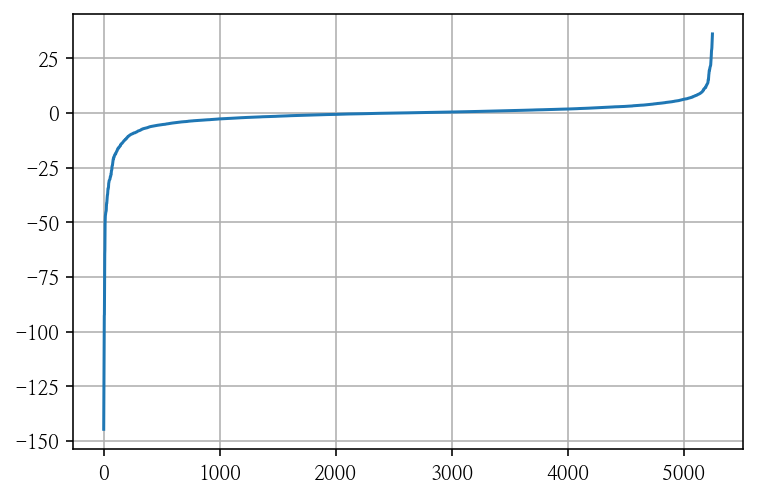

In [ ]:
df_pred.sort_values('차이(%)').reset_index()['차이(%)'].plot()

#### distribution of errors

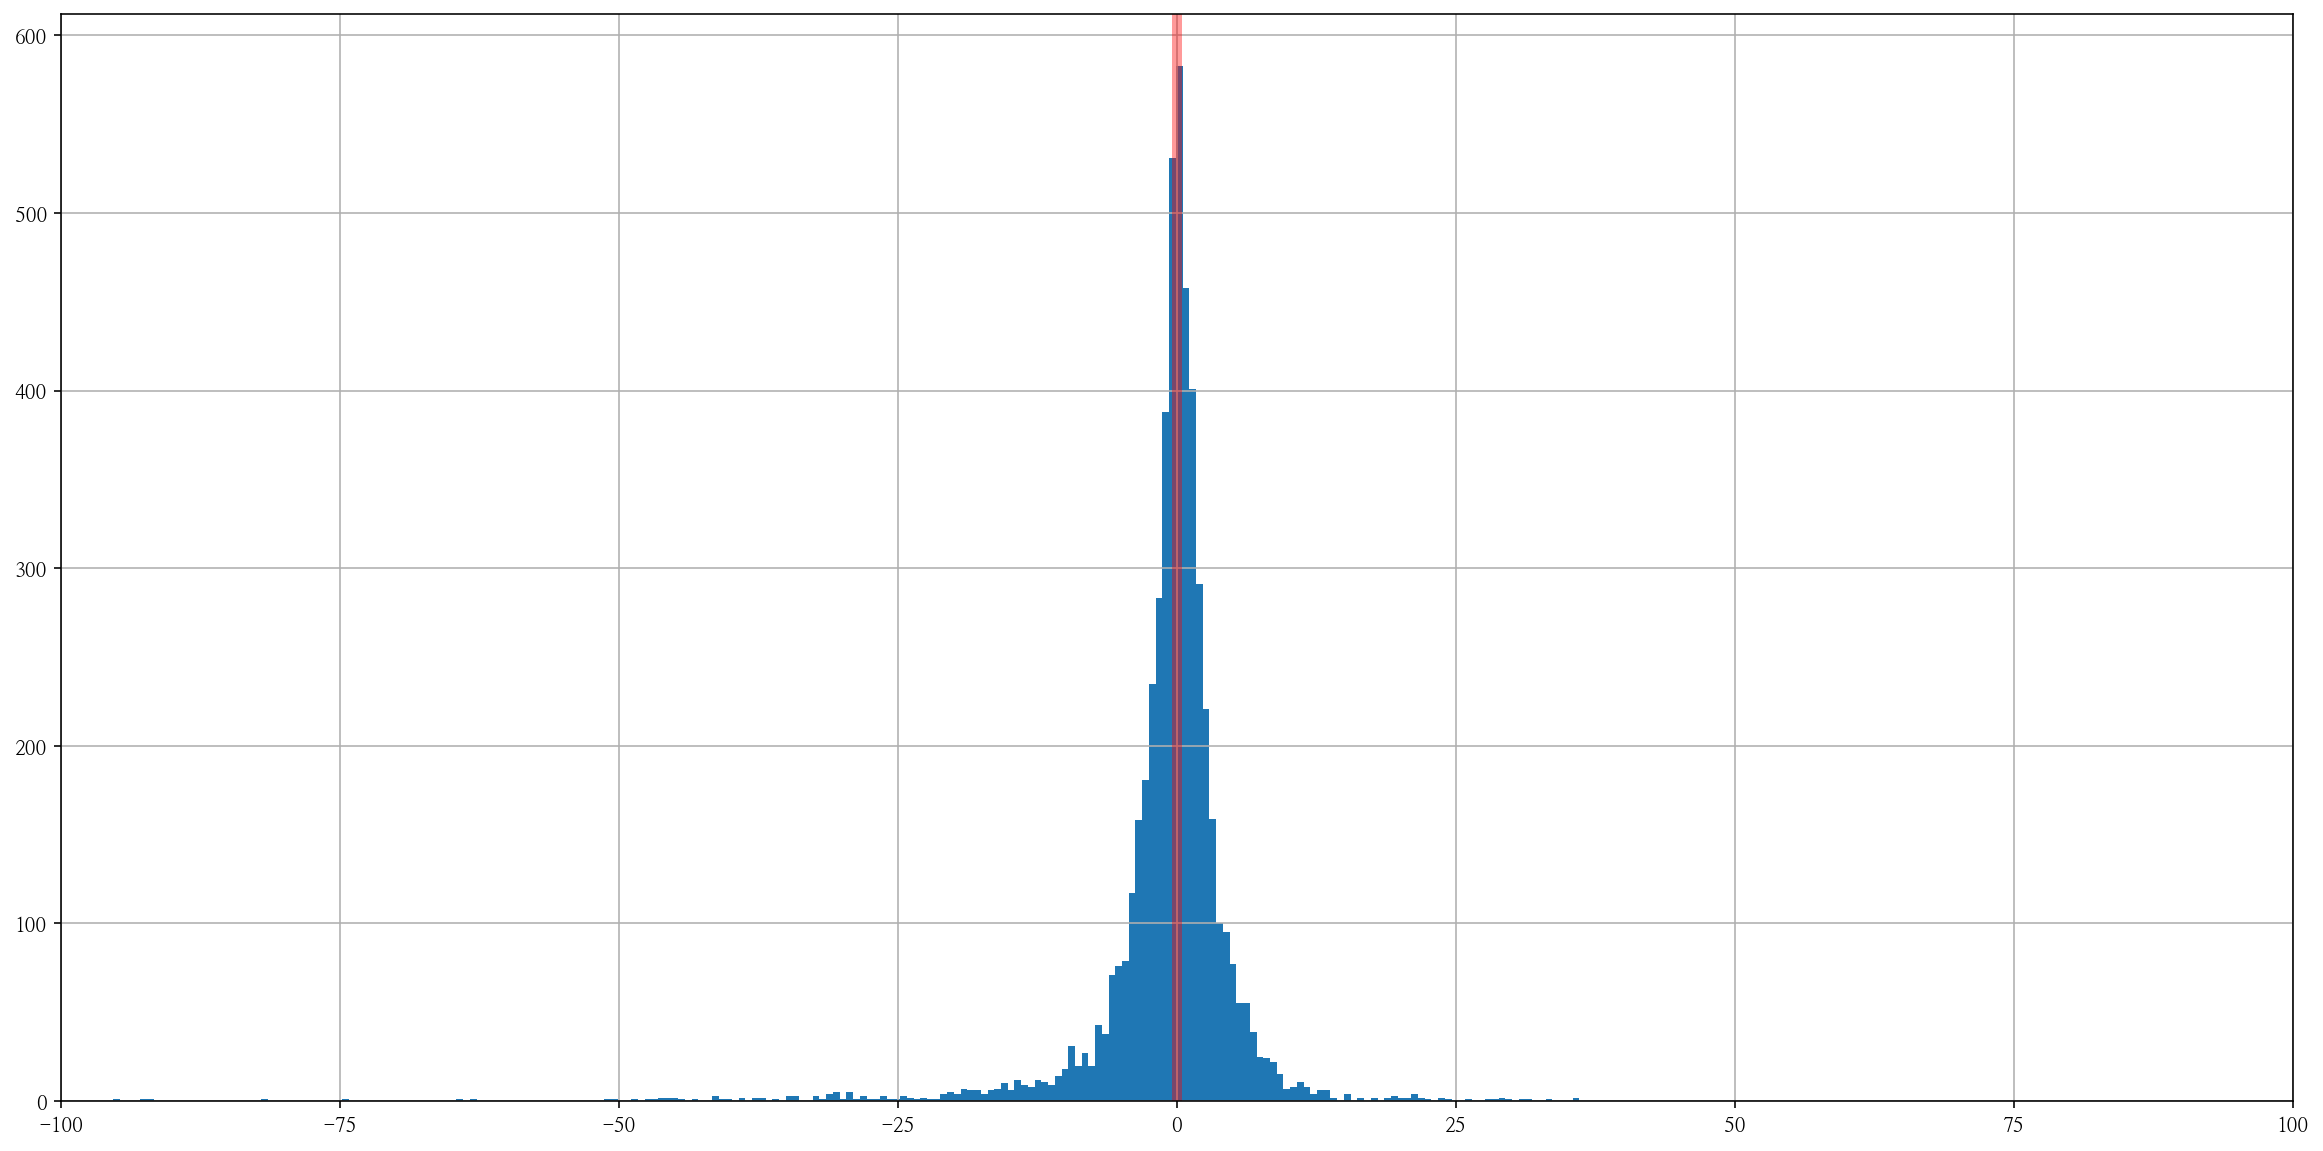

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(-100,100)
plt.axvline(0,color='r',alpha=0.4,linewidth=5)
plt.set_title('오차의 분포')
df_pred['차이(%)'].hist(bins=300,alpha=0.5)

#### divide zone

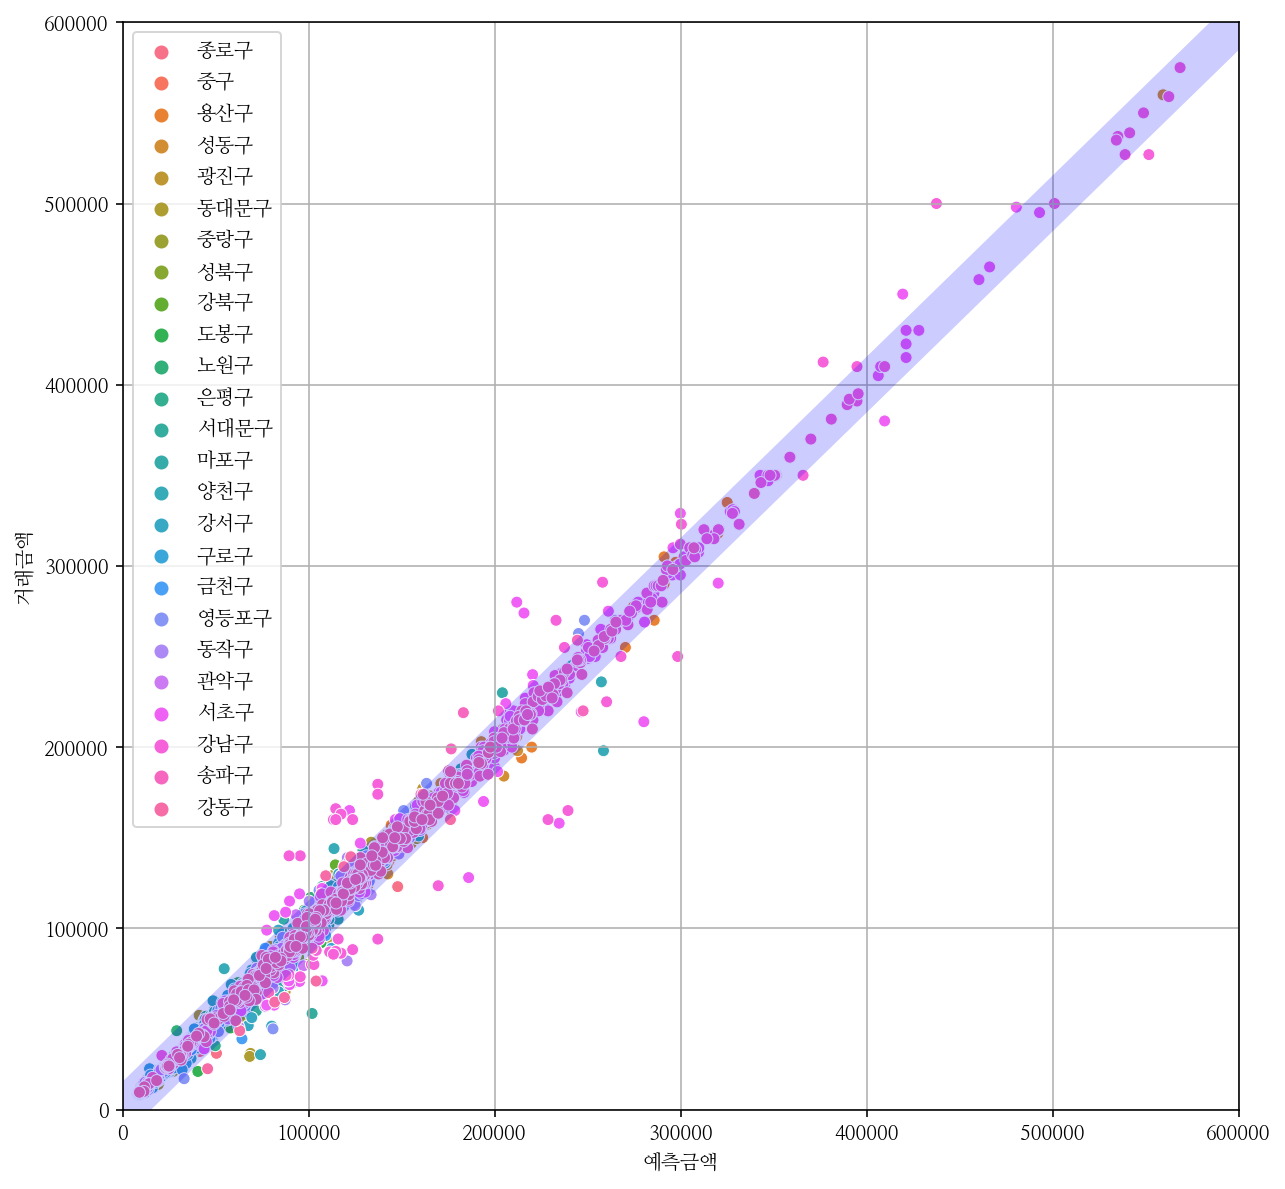

In [ ]:
plt.figure(figsize=(10,10))
plt.xlim(0,600000)
plt.ylim(0,600000)
sns.scatterplot(df_pred.예측금액, df_pred.거래금액,hue=df_pred.지역코드)
sns.lineplot((0,600000),(0,600000),linewidth=20,color='b',alpha=0.2);

In [ ]:
df_pred.to_csv('df_pred.csv')

In [ ]:
import plotly.express as px

fig = px.scatter(df_pred, x="예측금액", y="거래금액",color="지역코드")
fig.update_layout(
    autosize=False,
    width=950,
    height=800,)
fig.show()

# Interpretation

## in table

In [ ]:
df_pred[(df_pred['차이(%)']<1)&(df_pred['차이(%)']>-1)  & (df_pred['거래금액']<50000 ) & (df_pred['전용면적']>50)]

,거래금액,예측금액,차이,차이(%),지역코드,법정동,아파트,전용면적,층,건축년도,거래월일,count
75,25000,24918.678651,81.321349,0.325285,중구,중림동,성요셉,56.200,3,1975,2021-01,1
486,41000,41017.495050,-17.495050,-0.042671,광진구,중곡동,욱현,76.260,2,2002,2021-01,1
498,40000,39953.168976,46.831024,0.117078,광진구,중곡동,욱현,76.260,4,2002,2021-02,1
718,44500,44602.987231,-102.987231,-0.231432,동대문구,제기동,어반넥서스,52.840,7,2016,2021-01,1
784,47250,47400.925700,-150.925700,-0.319419,중랑구,망우동,가야써니빌,68.050,12,2002,2021-01,1
854,27800,27656.291518,143.708482,0.516937,중랑구,상봉동,그랑아파트,63.600,4,2004,2021-01,1
1220,44900,44819.135716,80.864284,0.180099,강북구,번동,신원,59.960,1,2000,2021-01,1
1238,46000,45804.370283,195.629717,0.425282,강북구,수유동,수유벽산2차,57.460,6,1994,2021-01,1
1244,46500,46354.233642,145.766358,0.313476,강북구,수유동,북한산 스카이뷰아파트,57.210,7,2020,2021-01,1
1284,47200,47606.454668,-406.454668,-0.861133,도봉구,방학동,신동아아파트1,62.220,5,1988,2021-01,1


In [ ]:
df_pred[(df_pred['법정동']=='청량리동')]

,거래금액,예측금액,차이,차이(%),지역코드,법정동,아파트,전용면적,층,건축년도,거래월일,count
731,124500,123179.471012,1320.528988,1.060666,동대문구,청량리동,미주,102.15,2,1978,2021-01,1
732,125000,125013.689171,-13.689171,-0.010951,동대문구,청량리동,미주,101.65,8,1978,2021-01,1
733,125000,125013.689171,-13.689171,-0.010951,동대문구,청량리동,미주,101.65,8,1978,2021-01,1
734,120000,121373.374801,-1373.374801,-1.144479,동대문구,청량리동,미주,101.62,3,1978,2021-01,1
735,100000,99652.688518,347.311482,0.347311,동대문구,청량리동,한신,114.95,1,1997,2021-01,1
736,148000,148200.118635,-200.118635,-0.135215,동대문구,청량리동,미주,137.46,12,1978,2021-01,1
737,144000,142642.373613,1357.626387,0.942796,동대문구,청량리동,미주,137.42,15,1978,2021-01,1
738,149500,158132.639000,-8632.639000,-5.774340,동대문구,청량리동,미주,152.17,7,1978,2021-01,1
739,100000,99310.251051,689.748949,0.689749,동대문구,청량리동,현대코아,139.98,18,1997,2021-01,1
740,129500,125794.710993,3705.289007,2.861227,동대문구,청량리동,미주,101.65,10,1978,2021-01,1


In [ ]:
df_pred[df_pred.아파트=='삼익그린2차']

,거래금액,예측금액,차이,차이(%),지역코드,법정동,아파트,전용면적,층,건축년도,거래월일,count
5060,110000,104775.331506,5224.668494,4.749699,강동구,명일동,삼익그린2차,54.810,3,1984,2021-01,1
5062,159000,156901.090682,2098.909318,1.320069,강동구,명일동,삼익그린2차,107.555,3,1983,2021-01,1
5063,126000,122723.640009,3276.359991,2.600286,강동구,명일동,삼익그린2차,66.870,6,1983,2021-01,1
5065,116000,121519.235809,-5519.235809,-4.757962,강동구,명일동,삼익그린2차,66.870,3,1984,2021-01,1
5067,150000,148734.088858,1265.911142,0.843941,강동구,명일동,삼익그린2차,84.755,9,1983,2021-01,1
5070,161500,156986.593691,4513.406309,2.794679,강동구,명일동,삼익그린2차,107.555,13,1983,2021-01,1
5071,105500,105110.058427,389.941573,0.369613,강동구,명일동,삼익그린2차,54.810,3,1983,2021-01,1
5072,110000,108228.806846,1771.193154,1.610176,강동구,명일동,삼익그린2차,54.810,6,1983,2021-01,1
5078,103000,106776.902523,-3776.902523,-3.666896,강동구,명일동,삼익그린2차,54.810,7,1984,2021-01,1
5083,94000,94441.147038,-441.147038,-0.469305,강동구,명일동,삼익그린2차,42.930,13,1983,2021-01,1


In [ ]:
df_pred.iloc[[5071]]

,거래금액,예측금액,차이,차이(%),지역코드,법정동,아파트,전용면적,층,건축년도,거래월일,count
5071,105500,105110.058427,389.941573,0.369613,강동구,명일동,삼익그린2차,54.81,3,1983,2021-01,1


In [ ]:
df_pred.iloc[[735]]

,거래금액,예측금액,차이,차이(%),지역코드,법정동,아파트,전용면적,층,건축년도,거래월일,count
735,100000,99652.688518,347.311482,0.347311,동대문구,청량리동,한신,114.95,1,1997,2021-01,1


## shap

In [ ]:
!pip install shap

In [ ]:
row = X_test_encoded.iloc[[5071]]
row2 = X_test_encoded.iloc[[735]]

In [ ]:
import shap
explainer = shap.TreeExplainer(lightGB)

In [ ]:
feature_name = ['GU', 'DONG', 'Apartment', 'size_of_space', 'floors', 'year_of_built', 'year_of_sales', 'months_of_sales', 'household', 'population',
                'vehicle_registration', 'moving', 'investment_foreigner', 'Korean_Bond(10yr)', 'Corporate_Bond_mean(3yr)',
                'CD_91_mean', 'consumer_price', 'agricultural, livestock and fisheries products', 'industrial products', 'public service', 'Core Inflation',
                'birth', 'death', 'marriage', 'divorced', 'DJI', 'IXIC', 'VIX',
                'SSEC', 'DE30', 'FCHI', 'NG', 'GC', 'CL', 'Cluster', 'KRX']

In [ ]:
shap_values = explainer.shap_values(row)

In [ ]:
shap_values2 = explainer.shap_values(row2)

In [ ]:
visvis = [[aa,bb] for aa,bb in zip(X_test.columns,shap_values.copy().astype(int)[0])]

In [ ]:
visvis2 = [[aa,bb] for aa,bb in zip(X_test.columns,shap_values2.copy().astype(int)[0])]

In [ ]:
df_visivs = pd.DataFrame(visvis,columns=['feature','importance']).sort_values('importance',ascending=False)
df_visivs2 = pd.DataFrame(visvis2,columns=['feature','importance']).sort_values('importance',ascending=False)

### Important Features

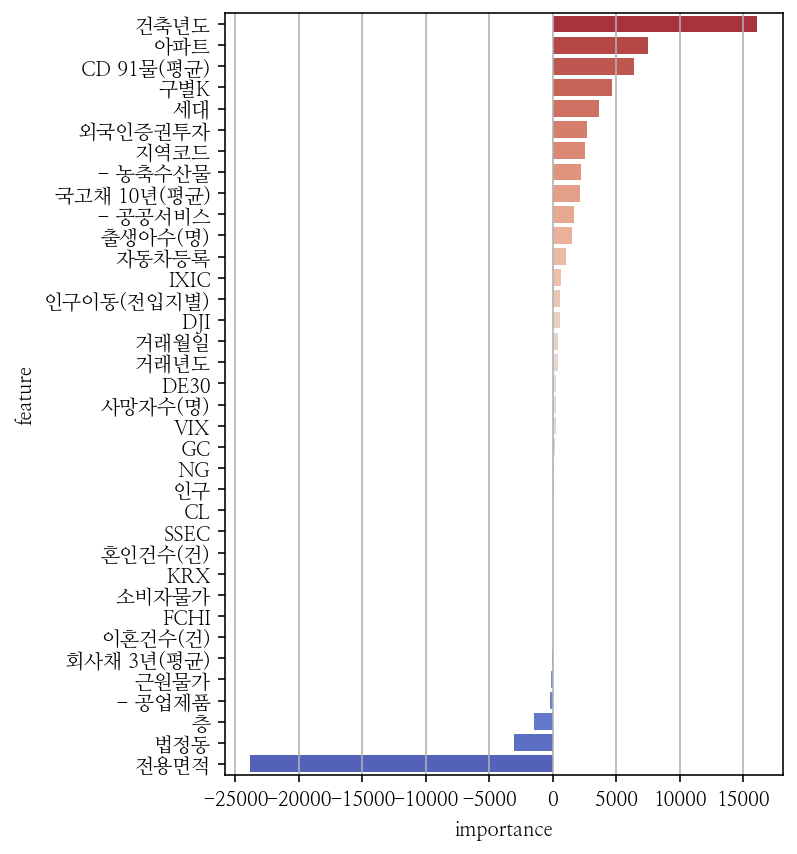

In [ ]:
plt.figure(figsize=(5,7))
sns.barplot(df_visivs.importance,df_visivs.feature,orient='h',palette='coolwarm_r');

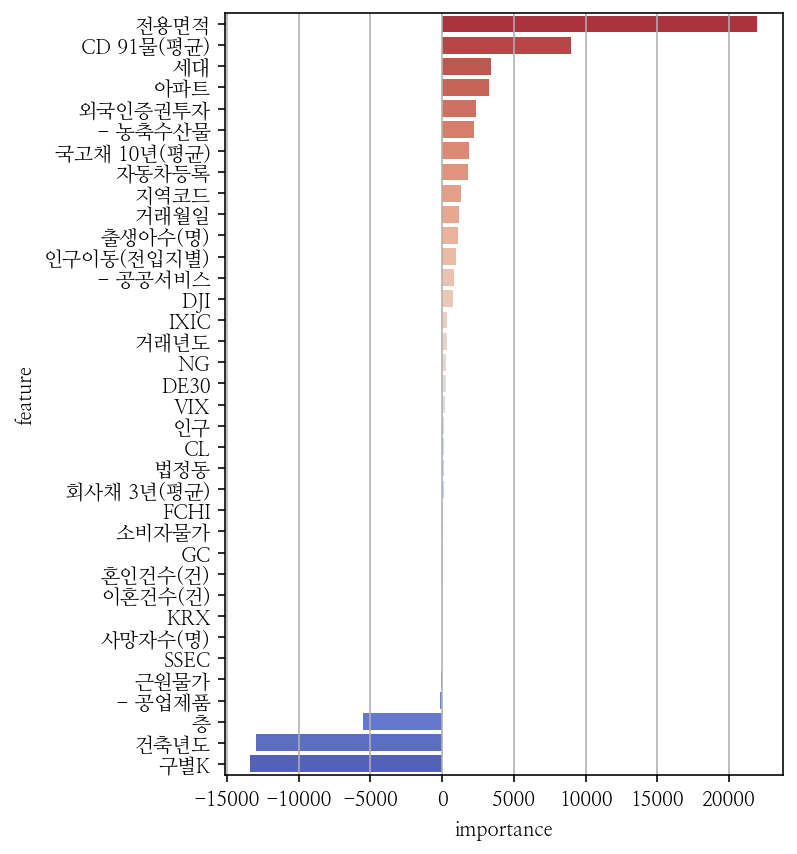

In [ ]:
plt.figure(figsize=(5,7))
sns.barplot(df_visivs2.importance,df_visivs2.feature,orient='h',palette='coolwarm_r');

### force plot

In [ ]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=feature_name
)

## eli5

In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

     |████████████████████████████████| 112kB 9.0MB/s 


In [ ]:
permuter = PermutationImportance(lightGB,
                                 n_iter=5,
                                 random_state=1
)

permuter.fit(X_val_encoded.iloc[randomnum], y_val.iloc[randomnum]);

feature_names = feature_name
pd.Series(permuter.feature_importances_, feature_names).sort_values()

consumer_price                                   -0.000701
GC                                               -0.000629
Core Inflation                                   -0.000623
Corporate_Bond_mean(3yr)                         -0.000557
FCHI                                             -0.000444
IXIC                                             -0.000373
KRX                                              -0.000328
NG                                               -0.000246
VIX                                              -0.000033
population                                       -0.000026
months_of_sales                                   0.000012
year_of_sales                                     0.000031
death                                             0.000080
vehicle_registration                              0.000147
marriage                                          0.000382
DE30                                              0.000396
SSEC                                              0.0004

### Permutation Importance

In [ ]:
eli5.show_weights(
    permuter, 
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.6112 ± 0.0562,Cluster
0.5450 ± 0.1049,size_of_space
0.2090 ± 0.0269,year_of_built
0.1032 ± 0.0157,DONG
0.0777 ± 0.0121,Apartment
0.0308 ± 0.0074,GU
0.0189 ± 0.0383,floors
0.0115 ± 0.0024,CD_91_mean
0.0063 ± 0.0010,Korean_Bond(10yr)
0.0054 ± 0.0018,household


In [ ]:
pd.Series(permuter.feature_importances_, X_test.columns).sort_values()

소비자물가         -0.000701
GC            -0.000629
근원물가          -0.000623
회사채 3년(평균)    -0.000557
FCHI          -0.000444
IXIC          -0.000373
KRX           -0.000328
NG            -0.000246
VIX           -0.000033
인구            -0.000026
거래월일           0.000012
거래년도           0.000031
사망자수(명)        0.000080
자동차등록          0.000147
혼인건수(건)        0.000382
DE30           0.000396
SSEC           0.000468
DJI            0.000548
CL             0.000721
외국인증권투자        0.001331
- 공공서비스        0.001399
이혼건수(건)        0.001400
- 농축수산물        0.001739
인구이동(전입지별)     0.002231
출생아수(명)        0.003069
- 공업제품         0.003222
세대             0.005418
국고채 10년(평균)    0.006338
CD 91물(평균)     0.011544
층              0.018931
지역코드           0.030756
아파트            0.077715
법정동            0.103235
건축년도           0.209002
전용면적           0.544966
구별K            0.611205
dtype: float64

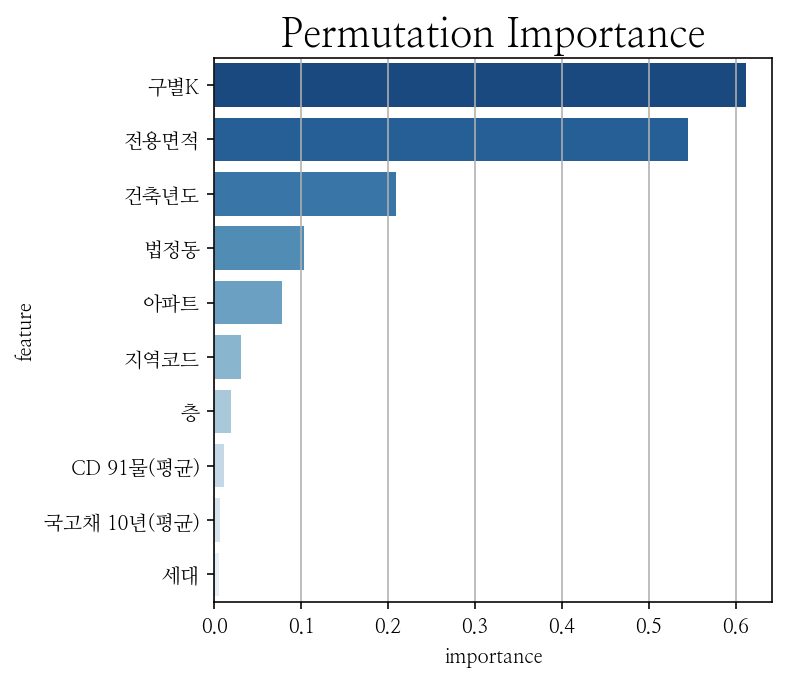

In [ ]:
zipp  = []
for zipper in zip(X_train.columns, permuter.feature_importances_):
  zipp.append(zipper)
zipp = pd.DataFrame(zipp,columns=['feature','importance']).sort_values('importance',ascending=False)
plt.figure(figsize=(5,5))
sns.barplot(y = zipp.feature[:10], x= zipp.importance[:10], palette='Blues_r')
plt.title("Permutation Importance",fontsize=20);

## pdpbox

In [ ]:
!pip install pdpbox
from pdpbox.pdp import pdp_isolate, pdp_plot

     |████████████████████████████████| 57.7MB 61kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690724 sha256=1826d2ccc213f0a86a4b758413edf20517e22bcca6ad128501cae51d003d3c54
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [ ]:
feature_names

['GU',
 'DONG',
 'Apartment',
 'size_of_space',
 'floors',
 'year_of_built',
 'year_of_sales',
 'months_of_sales',
 'household',
 'population',
 'vehicle_registration',
 'moving',
 'investment_foreigner',
 'Korean_Bond(10yr)',
 'Corporate_Bond_mean(3yr)',
 'CD_91_mean',
 'consumer_price',
 'agricultural, livestock and fisheries products',
 'industrial products',
 'public service',
 'Core Inflation',
 'birth',
 'death',
 'marriage',
 'divorced',
 'DJI',
 'IXIC',
 'VIX',
 'SSEC',
 'DE30',
 'FCHI',
 'NG',
 'GC',
 'CL',
 'Cluster',
 'KRX']

In [ ]:
X_test_encoded

,지역코드,법정동,아파트,전용면적,층,건축년도,거래년도,거래월일,세대,인구,자동차등록,인구이동(전입지별),외국인증권투자,국고채 10년(평균),회사채 3년(평균),CD 91물(평균),소비자물가,- 농축수산물,- 공업제품,- 공공서비스,근원물가,출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),DJI,IXIC,VIX,SSEC,DE30,FCHI,NG,GC,CL,구별K,KRX
2098,14,285,3000.0,149.800,11,2008,2021,35,185109,400989,114020,133111,787.9,1.73,2.14,0.68,0.5,9.7,-0.9,-2.0,0.9,3483,3823,3802,1498,30820.998000,13177.201500,24.881500,3566.428000,13823.259000,5589.485000,2.653150,43.177000,80.945000,4,4064.580500
2099,14,300,3674.0,45.879,17,2017,2021,35,185109,400989,114020,133111,787.9,1.73,2.14,0.68,0.5,9.7,-0.9,-2.0,0.9,3483,3823,3802,1498,30820.998000,13177.201500,24.881500,3566.428000,13823.259000,5589.485000,2.653150,43.177000,80.945000,4,4064.580500
2100,14,271,4725.0,174.550,4,2004,2021,35,185109,400989,114020,133111,787.9,1.73,2.14,0.68,0.5,9.7,-0.9,-2.0,0.9,3483,3823,3802,1498,30820.998000,13177.201500,24.881500,3566.428000,13823.259000,5589.485000,2.653150,43.177000,80.945000,4,4064.580500
2101,14,271,3163.0,123.130,13,2004,2021,35,185109,400989,114020,133111,787.9,1.73,2.14,0.68,0.5,9.7,-0.9,-2.0,0.9,3483,3823,3802,1498,30820.998000,13177.201500,24.881500,3566.428000,13823.259000,5589.485000,2.653150,43.177000,80.945000,4,4064.580500
2102,14,273,3335.0,84.620,1,2003,2021,35,185109,400989,114020,133111,787.9,1.73,2.14,0.68,0.5,9.7,-0.9,-2.0,0.9,3483,3823,3802,1498,30820.998000,13177.201500,24.881500,3566.428000,13823.259000,5589.485000,2.653150,43.177000,80.945000,4,4064.580500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244451,20,108,2469.0,75.680,1,2003,2021,38,185109,400989,114020,133111,787.9,1.73,2.14,0.68,0.5,9.7,-0.9,-2.0,0.9,3483,3823,3802,1498,31199.054615,13842.613077,22.746154,3590.945385,13951.516154,5672.654615,2.948692,42.433846,78.786154,4,4075.716923
244452,20,108,2929.0,27.150,12,2016,2021,38,185109,400989,114020,133111,787.9,1.73,2.14,0.68,0.5,9.7,-0.9,-2.0,0.9,3483,3823,3802,1498,31199.054615,13842.613077,22.746154,3590.945385,13951.516154,5672.654615,2.948692,42.433846,78.786154,4,4075.716923
244453,20,33,543.0,59.520,6,1998,2021,38,185109,400989,114020,133111,787.9,1.73,2.14,0.68,0.5,9.7,-0.9,-2.0,0.9,3483,3823,3802,1498,31199.054615,13842.613077,22.746154,3590.945385,13951.516154,5672.654615,2.948692,42.433846,78.786154,4,4075.716923
244454,20,33,489.0,112.110,2,2008,2021,38,185109,400989,114020,133111,787.9,1.73,2.14,0.68,0.5,9.7,-0.9,-2.0,0.9,3483,3823,3802,1498,31199.054615,13842.613077,22.746154,3590.945385,13951.516154,5672.654615,2.948692,42.433846,78.786154,4,4075.716923


### 전용면적

In [ ]:
isolated = pdp_isolate(
    model=lightGB, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature='전용면적',
    grid_type='percentile',
    num_grid_points=10
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


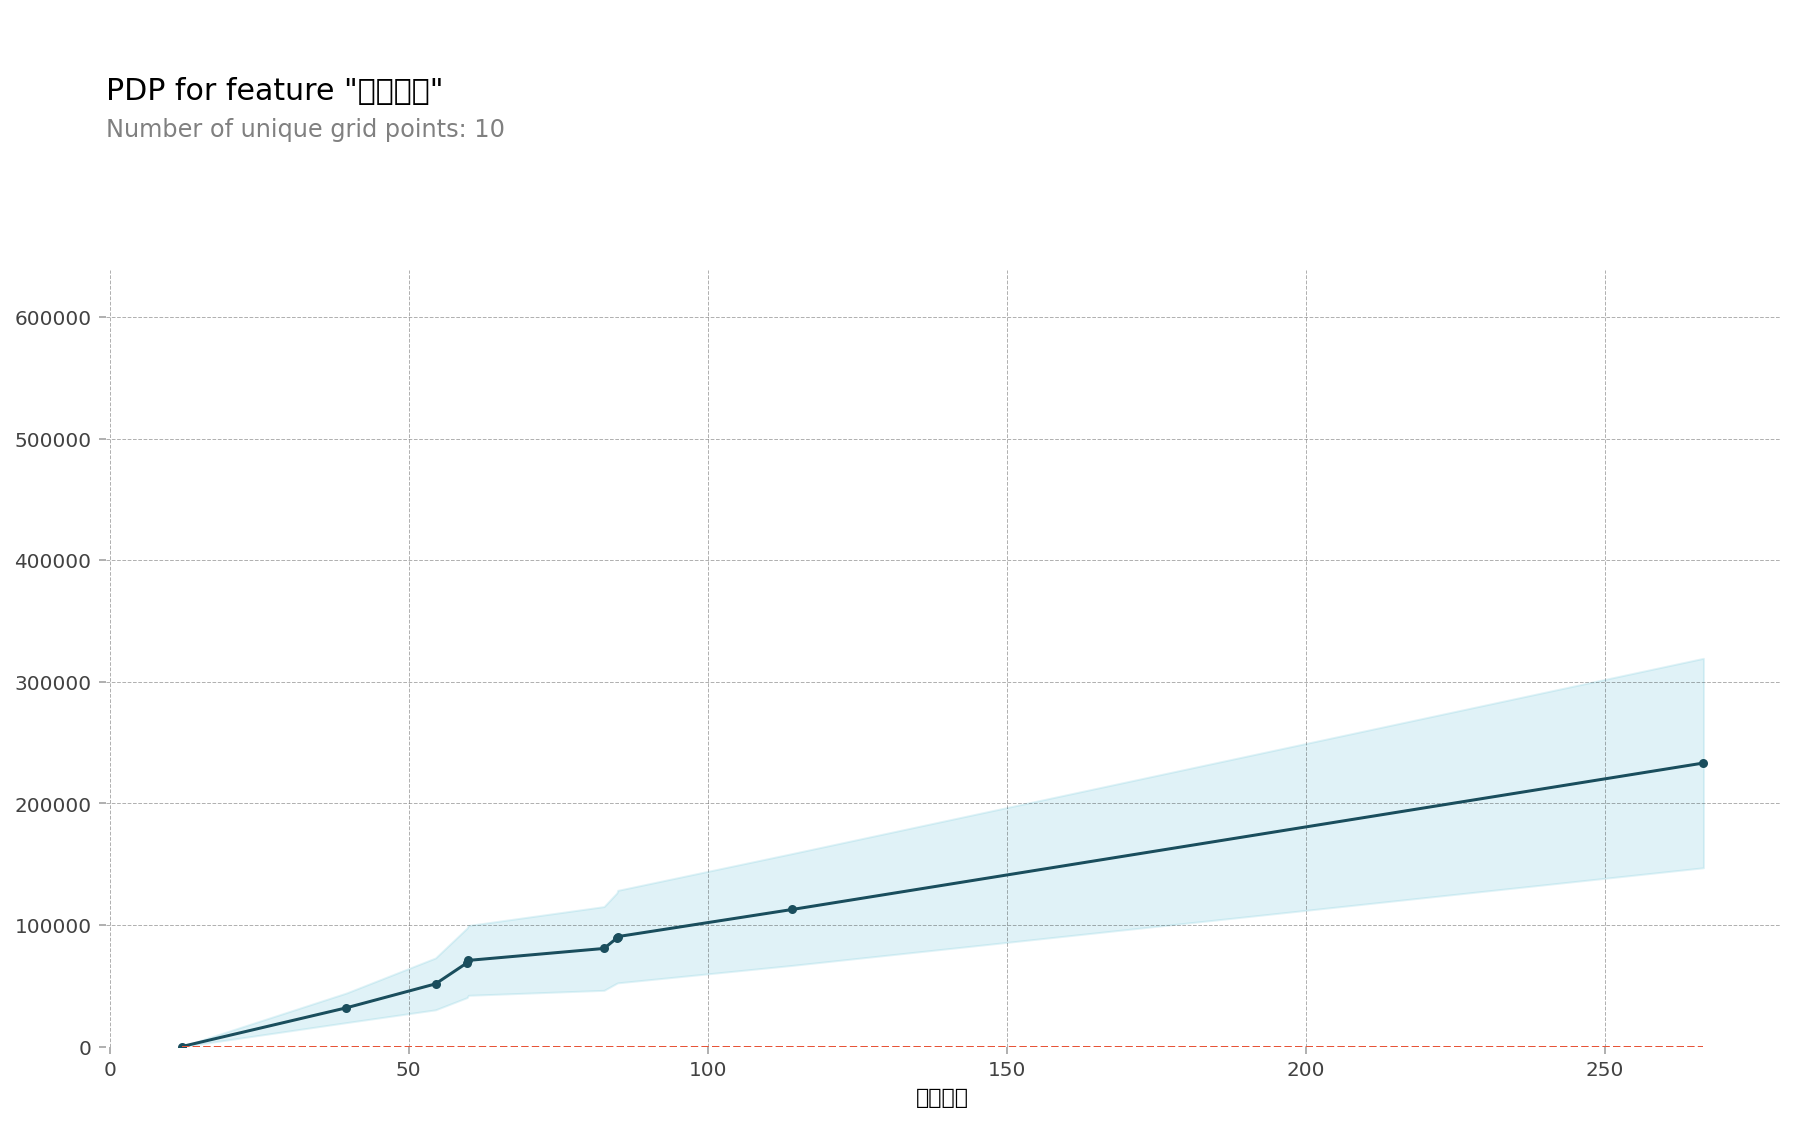

In [ ]:
# PDP
pdp_plot(isolated, feature_name='전용면적');

(<Figure size 1080x684 with 3 Axes>,
 {'pdp_ax': {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc9fe02f908>,
   '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc9fe07e748>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc9fe0cbeb8>})

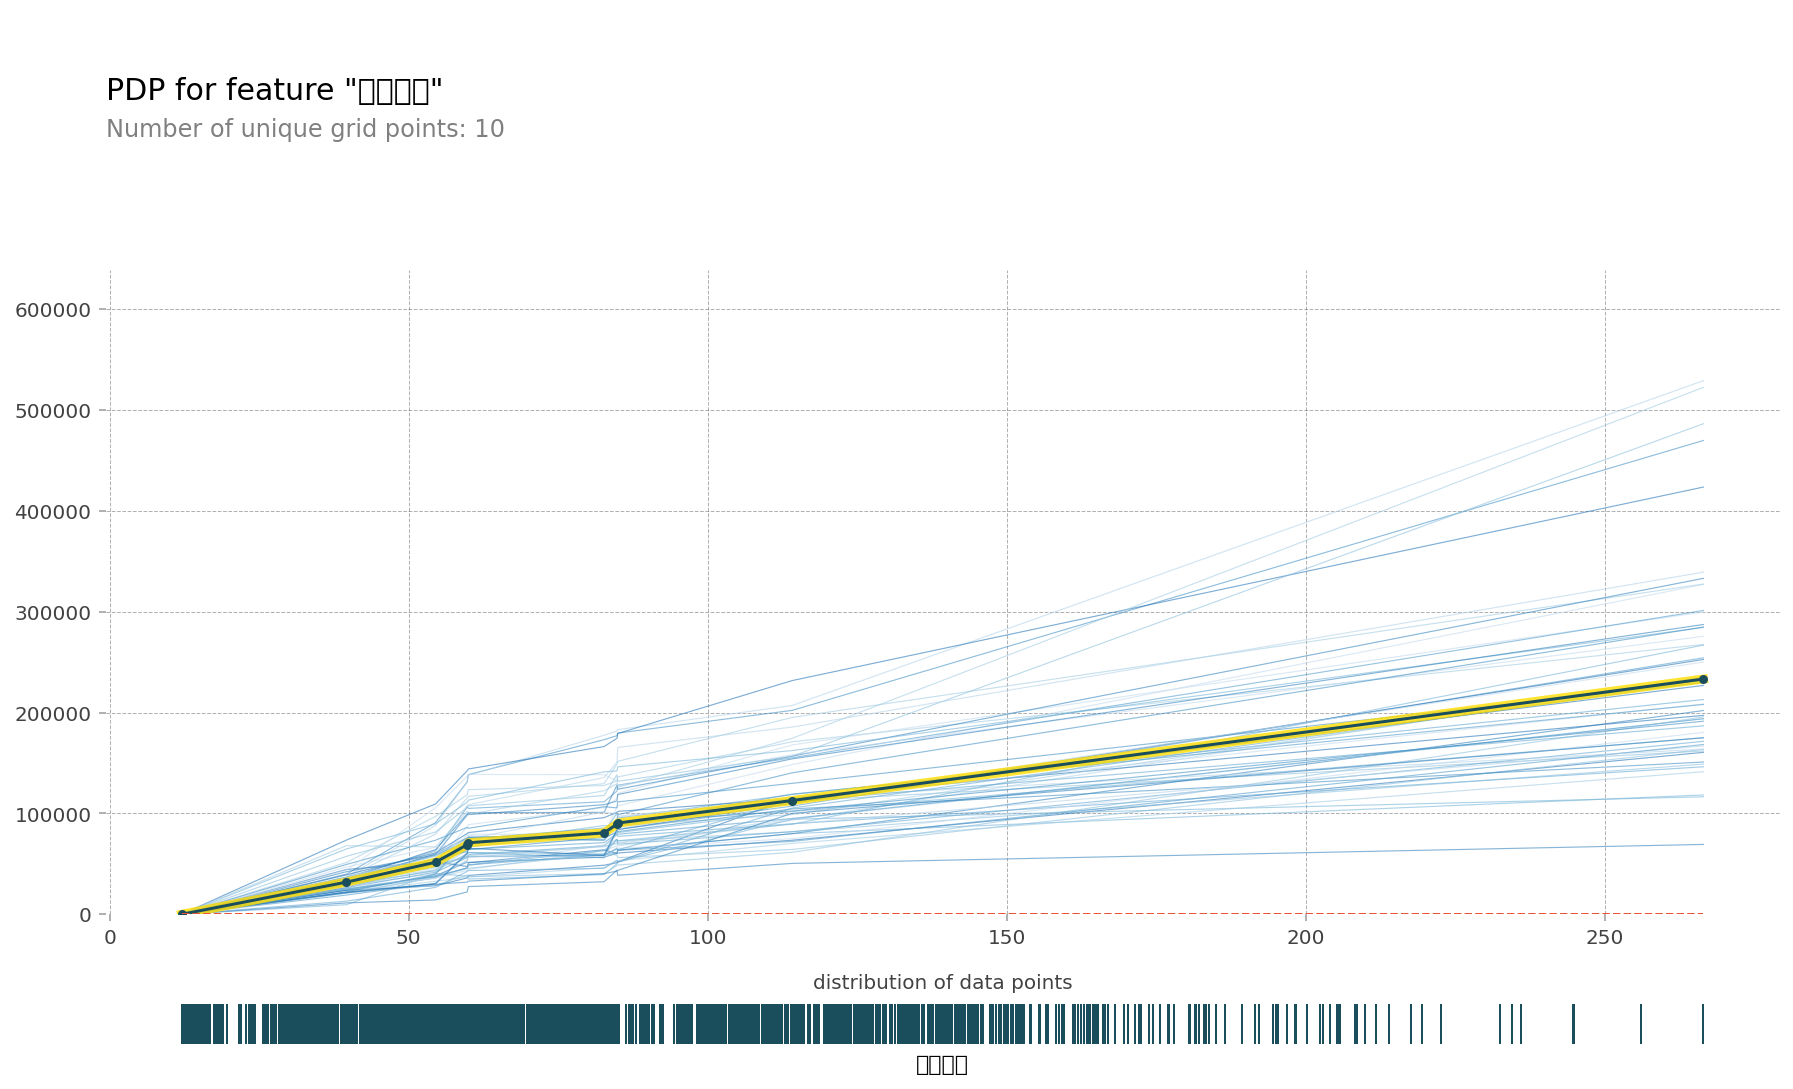

In [ ]:
# PDP with Icecurve
pdp_plot(isolated
         , feature_name='전용면적'
         , plot_lines=True
         , frac_to_plot=0.01
         , plot_pts_dist=True) 


In [ ]:
X_val_encoded.shape

(48892, 36)

### 건축년도

In [ ]:
isolated = pdp_isolate(
    model=lightGB, 
    dataset=X_val_encoded.iloc[:2000], 
    model_features=X_val_encoded.columns, 
    feature='건축년도',
    grid_type='percentile',
    num_grid_points=15
)

In [ ]:
pdp_plot(isolated, feature_name='건축년도');

(<Figure size 1080x684 with 3 Axes>,
 {'pdp_ax': {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc9f6f6b898>,
   '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc9f6f3b5f8>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc9f6f782e8>})

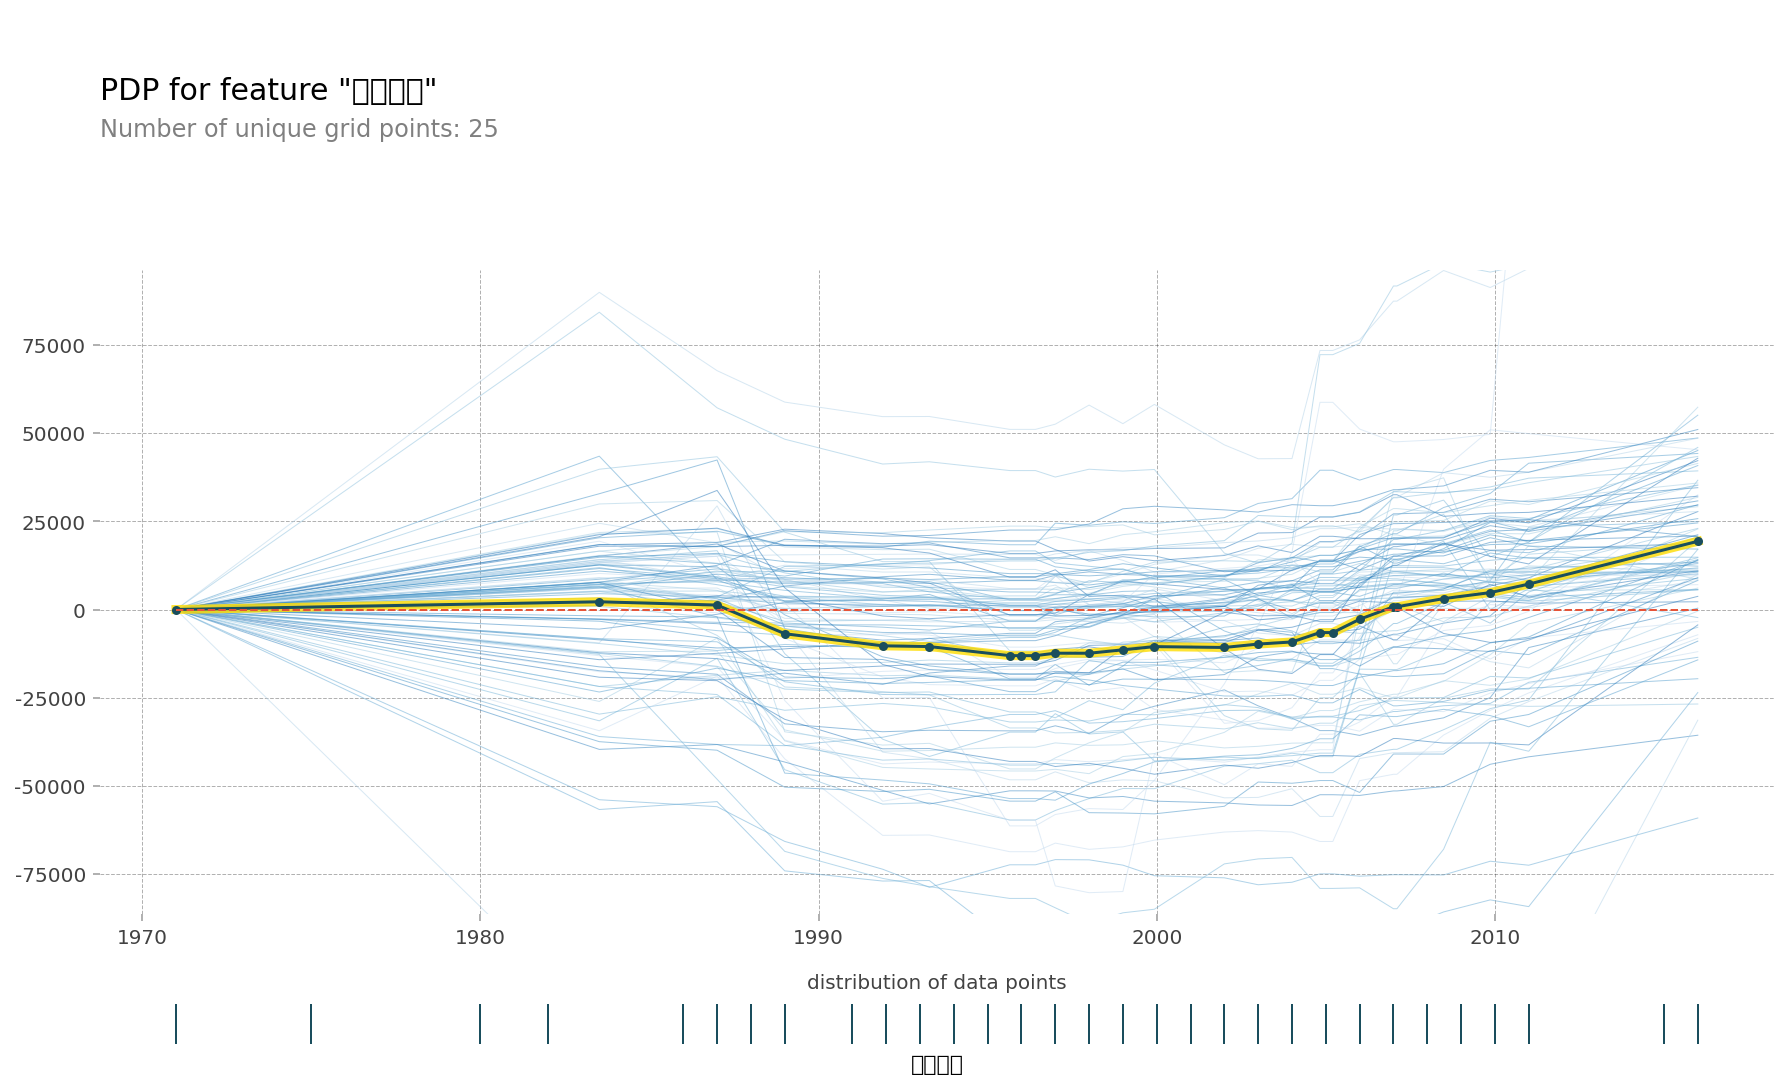

In [ ]:
pdp_plot(isolated
         , feature_name='건축년도'
         , plot_lines=True
         , frac_to_plot=1
         , plot_pts_dist=True) 


### Interact

#### 2D

In [ ]:
import random
randomnum = [random.randint(1,48892) for x in range(1,100)]

(<Figure size 1080x1080 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc9fa3dac18>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc9fa983b00>})

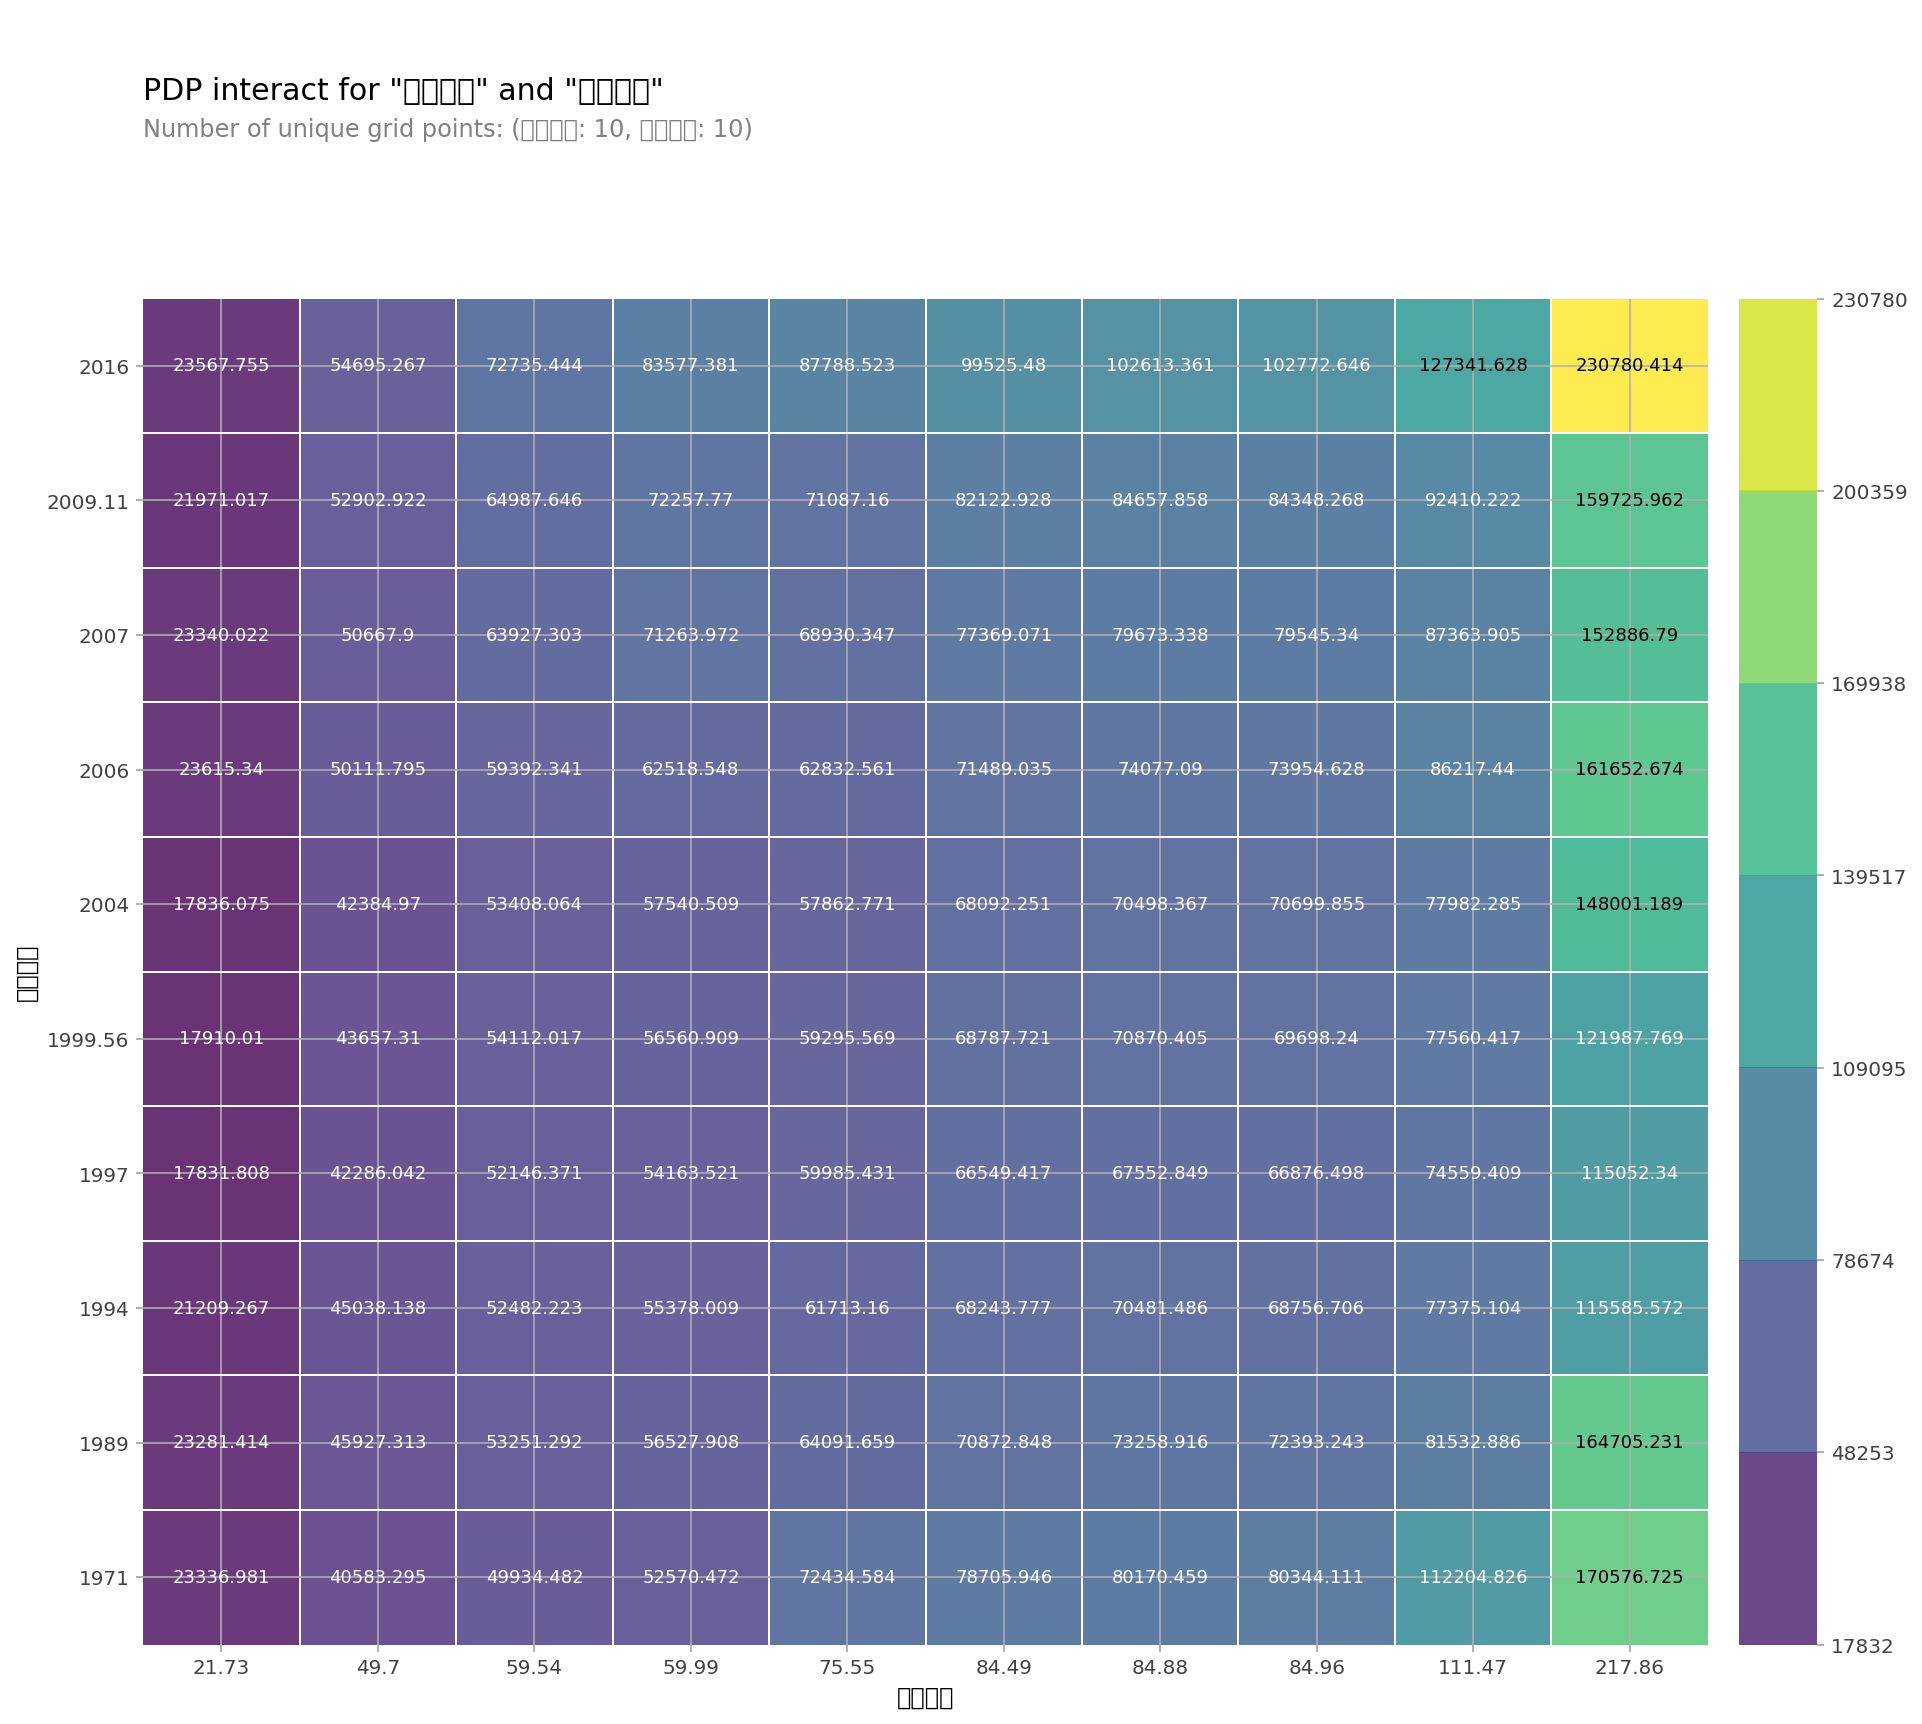

In [ ]:
  
# Interact
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['전용면적', '건축년도']
interaction = pdp_interact(
    model=lightGB, 
    dataset=X_val_encoded.iloc[randomnum],
    model_features=X_val_encoded.columns, 
    features=features
)
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features,figsize = (15,15))

In [ ]:
pdp_heat.columns = pdp_heat.columns.astype(int)
pdp_heat.index = pdp_heat.index.astype(int)

In [ ]:
pdp_heat.to_csv('pdp_3d.csv')

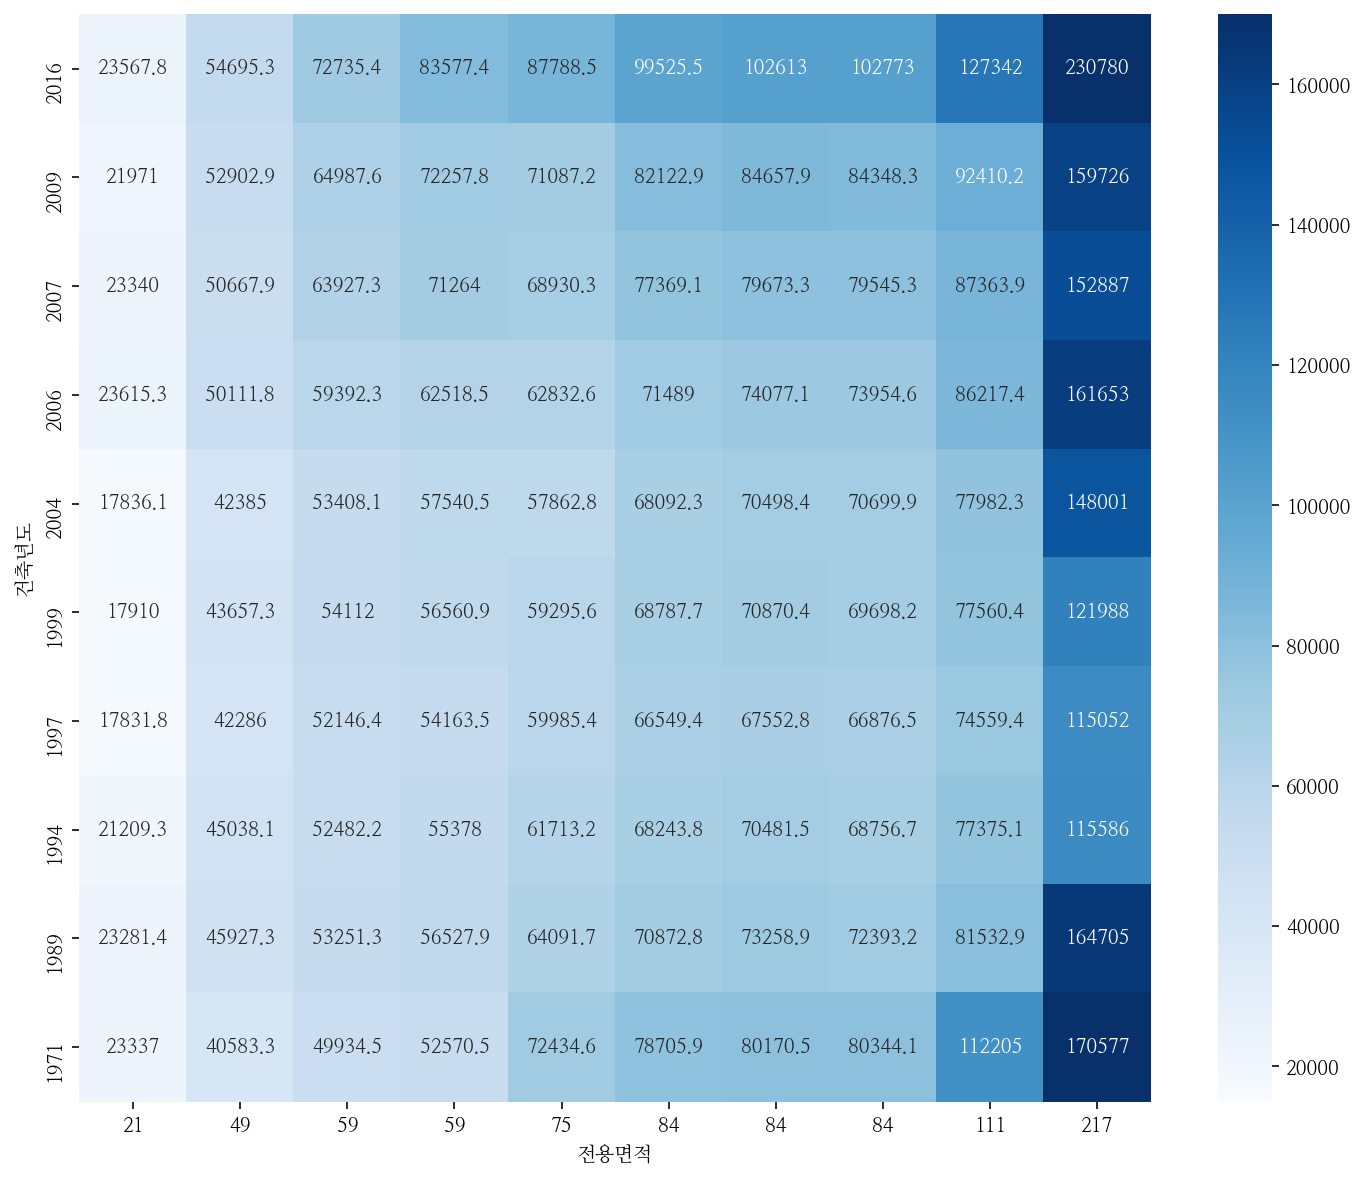

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(pdp_heat,annot=True,cmap="Blues", fmt='g',vmax=170000,vmin=15000)

#### 3D

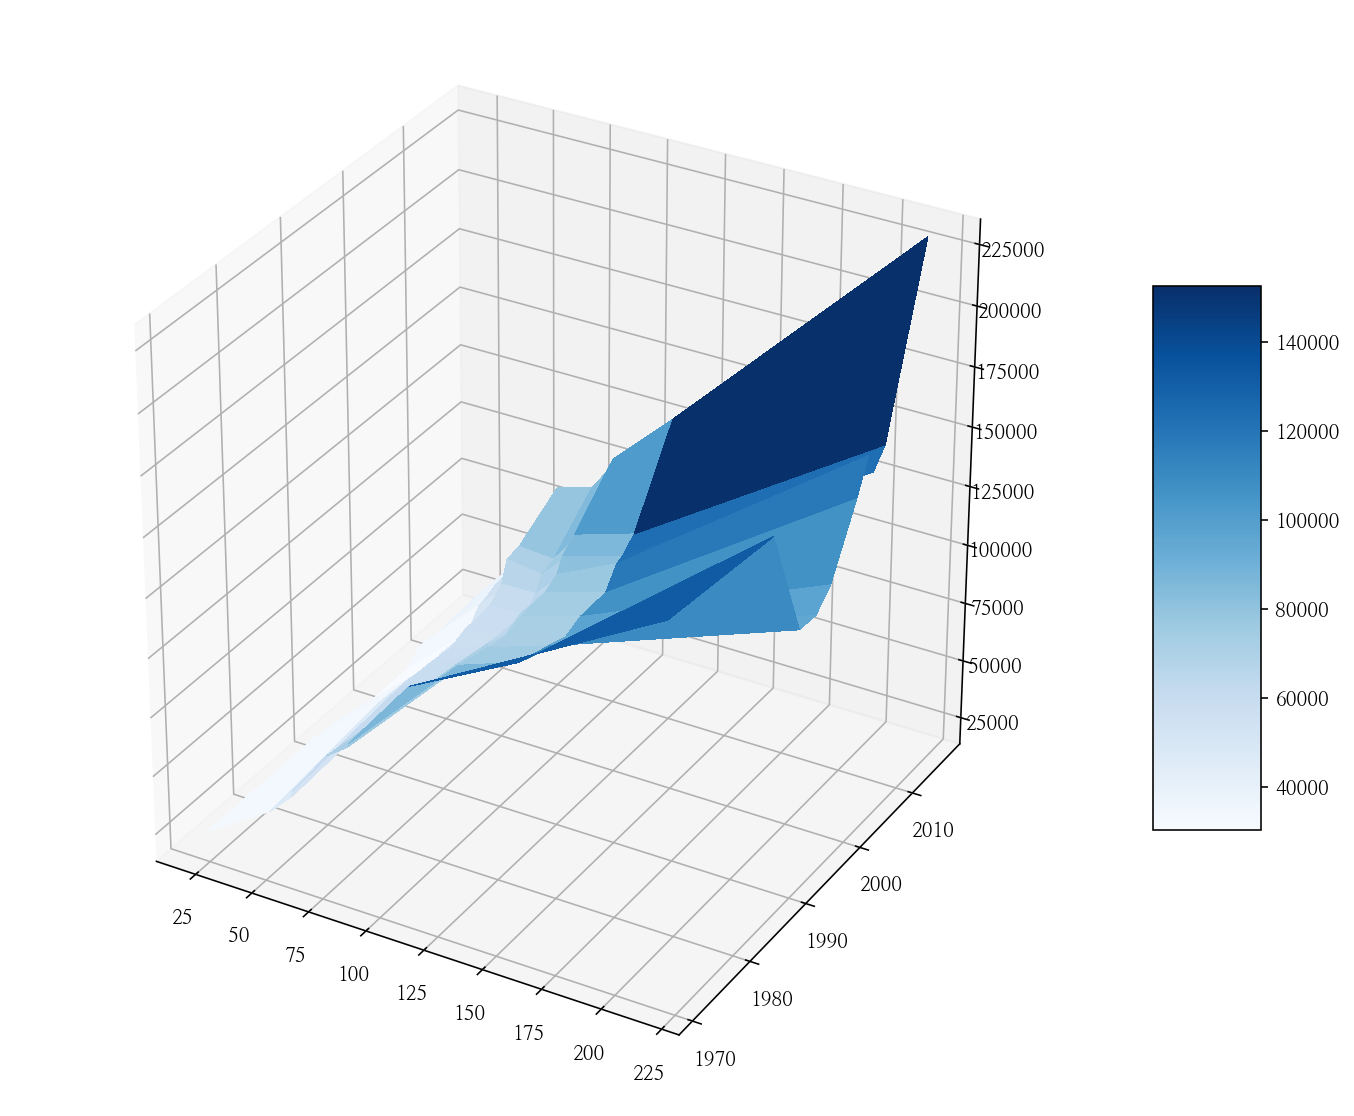

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(12,10))

# Make data.
X = pdp.columns
Y = pdp.index
Z = pdp.values
X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Blues,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
# Interact in plotly
import plotly.graph_objs as go
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], 
    index=features[1]
)[::-1]

surface = go.Surface(
    x=pdp.columns, 
    y=pdp.index, 
    z=pdp.values
)


layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title=target)
    )
)

fig = go.Figure(surface, layout)
fig.show()